In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

58.937076114901146 -116.08653422695937
14.500836485832494 -133.60005303267408
-11.914343719868583 91.46782527770074
43.494757946555694 -32.81113311551792
63.33249185765979 73.3517465190732
-65.81459001882016 -136.3118121532696
-89.19268026692944 100.47184626596231
-0.9121155383730724 -85.2345037234507
82.54564142119489 144.86367113146093
-57.27224362602451 -3.8975956477946454
-35.922716994851655 72.22826945114207
-42.8384653453564 81.66758179722649
-80.3996344384375 150.51510359112814
-64.90240178447995 69.6363729874256
-35.80811791007556 -44.47195622613745
-42.584172561114634 -14.392824483023105
-32.092604238124366 57.65727843553006
84.55484335929319 155.62234678901729
50.560909816825614 -7.50064230931244
-79.68927644293062 73.36812034618305
-72.8033131900869 -154.10616137653855
22.375431722820707 -144.78473725447654
-80.15368327470154 50.6692073172359
7.0436375915874265 -33.55792632005935
52.085754883928104 57.62994553525965
-6.578626348513097 -167.54983648988863
-85.64728758036367 -

17.8114533246723 56.937688765604605
18.456942895927455 159.96831925243185
-9.616060464189346 141.8131151265231
-30.14446566768821 106.4967215860363
-7.800328305465314 141.4889471972764
62.62348003371423 160.49717805372933
-0.08181509709231705 96.97663599144789
32.99392722266343 -125.67278588360408
45.020907032726825 -46.939386832649774
-44.781410974550454 21.53011810982389
-47.542342541337 -134.38382707009748
62.54032660184268 2.3332262000203343
-8.350278653821249 -97.44195059595017
-53.73944481688422 -34.01939620910625
20.35018360231757 -96.6222081916959
32.65044685708948 20.4700705309084
75.09394357016802 -123.174680496359
-54.837079598441115 135.9858626231051
-20.774923155042288 -62.50075232190831
56.159098974626204 46.34486804455614
51.41101839419949 43.67569589391189
-9.806078269395002 126.85974942522256
-60.84672336403393 75.27792770684087
-39.393678510788774 103.4978328856181
-65.4247624234531 60.58404296378612
45.65201191008049 -164.3938596145232
45.55699154945168 106.637612102

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3ad172bff146246b1b1e0b879d946363


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | high level
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | bengkulu
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | muravlenko
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | san cristobal
Processing Record 9 of Set 1 | chokurdakh
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | mahebourg
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | cidreira
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | youghal
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | trairi
Processing Record 21 of Set 1 | zilair
Processing Record 22 of Set 1 | lufilufi
Processing Record 23 of Set 1 | punta arenas
Processing Record 2

Processing Record 42 of Set 4 | tyrma
Processing Record 43 of Set 4 | upernavik
Processing Record 44 of Set 4 | kobojango
City not found. Skipping...
Processing Record 45 of Set 4 | port lincoln
Processing Record 46 of Set 4 | pevek
Processing Record 47 of Set 4 | caravelas
Processing Record 48 of Set 4 | constitucion
Processing Record 49 of Set 4 | mbanza-ngungu
Processing Record 50 of Set 4 | galesong
Processing Record 1 of Set 5 | grande prairie
Processing Record 2 of Set 5 | haverfordwest
Processing Record 3 of Set 5 | hithadhoo
Processing Record 4 of Set 5 | isangel
Processing Record 5 of Set 5 | seoul
Processing Record 6 of Set 5 | tongling
Processing Record 7 of Set 5 | evensk
Processing Record 8 of Set 5 | alice springs
Processing Record 9 of Set 5 | bethel
Processing Record 10 of Set 5 | quelimane
Processing Record 11 of Set 5 | omboue
Processing Record 12 of Set 5 | ambilobe
Processing Record 13 of Set 5 | tessalit
Processing Record 14 of Set 5 | umzimvubu
City not found. Ski

Processing Record 33 of Set 8 | tamworth
Processing Record 34 of Set 8 | saint-louis
Processing Record 35 of Set 8 | leningradskiy
Processing Record 36 of Set 8 | kushmurun
Processing Record 37 of Set 8 | borodyanka
Processing Record 38 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 39 of Set 8 | yulara
Processing Record 40 of Set 8 | anaconda
Processing Record 41 of Set 8 | bubaque
Processing Record 42 of Set 8 | bathsheba
Processing Record 43 of Set 8 | hobyo
Processing Record 44 of Set 8 | havre
Processing Record 45 of Set 8 | seymchan
Processing Record 46 of Set 8 | praia da vitoria
Processing Record 47 of Set 8 | vallenar
Processing Record 48 of Set 8 | muncar
Processing Record 49 of Set 8 | makakilo city
Processing Record 50 of Set 8 | copiapo
Processing Record 1 of Set 9 | lithakia
Processing Record 2 of Set 9 | ulvik
Processing Record 3 of Set 9 | abrud
Processing Record 4 of Set 9 | la ronge
Processing Record 5 of Set 9 | nongan
Processing Record 6 of Set 

Processing Record 26 of Set 12 | galway
Processing Record 27 of Set 12 | yichun
Processing Record 28 of Set 12 | sembakung
Processing Record 29 of Set 12 | katobu
Processing Record 30 of Set 12 | goodyear
Processing Record 31 of Set 12 | bam
Processing Record 32 of Set 12 | namibe
Processing Record 33 of Set 12 | vaitape
Processing Record 34 of Set 12 | krasnyy chikoy
Processing Record 35 of Set 12 | siniscola
Processing Record 36 of Set 12 | vila
Processing Record 37 of Set 12 | umred
Processing Record 38 of Set 12 | axim
Processing Record 39 of Set 12 | honningsvag
Processing Record 40 of Set 12 | kazuno
Processing Record 41 of Set 12 | wenling
Processing Record 42 of Set 12 | camopi
Processing Record 43 of Set 12 | sattahip
Processing Record 44 of Set 12 | kamiiso
Processing Record 45 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 46 of Set 12 | mao
Processing Record 47 of Set 12 | awjilah
Processing Record 48 of Set 12 | gympie
Processing Record 49 of Set 12 |

In [12]:
len(city_data)

592

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,High Level,58.5169,-117.1360,62.71,88,75,2.30,CA,2022-06-20 02:45:05
1,Hilo,19.7297,-155.0900,82.27,73,100,11.50,US,2022-06-20 02:45:05
2,Bengkulu,-3.8004,102.2655,79.25,85,74,9.15,ID,2022-06-20 02:45:05
3,Ribeira Grande,38.5167,-28.7000,63.59,74,27,22.41,PT,2022-06-20 02:45:06
4,Muravlenko,63.7898,74.5230,71.98,44,67,6.31,RU,2022-06-20 02:45:06
5,Rikitea,-23.1203,-134.9692,71.51,63,89,20.56,PF,2022-06-20 02:45:06
6,Albany,42.6001,-73.9662,59.45,56,2,1.99,US,2022-06-20 02:45:07
7,San Cristobal,7.7669,-72.2250,68.18,96,33,2.17,VE,2022-06-20 02:41:51
8,Chokurdakh,70.6333,147.9167,39.69,78,100,20.62,RU,2022-06-20 02:45:07
9,Cape Town,-33.9258,18.4232,58.37,72,0,13.80,ZA,2022-06-20 02:45:07


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,High Level,CA,2022-06-20 02:45:05,58.5169,-117.1360,62.71,88,75,2.30
1,Hilo,US,2022-06-20 02:45:05,19.7297,-155.0900,82.27,73,100,11.50
2,Bengkulu,ID,2022-06-20 02:45:05,-3.8004,102.2655,79.25,85,74,9.15
3,Ribeira Grande,PT,2022-06-20 02:45:06,38.5167,-28.7000,63.59,74,27,22.41
4,Muravlenko,RU,2022-06-20 02:45:06,63.7898,74.5230,71.98,44,67,6.31
...,...,...,...,...,...,...,...,...,...
587,Hasaki,JP,2022-06-20 02:55:27,35.7333,140.8333,86.29,82,100,10.47
588,Sao Filipe,CV,2022-06-20 02:59:56,14.8961,-24.4956,73.71,94,100,10.92
589,Erdenet,MN,2022-06-20 02:59:56,49.0333,104.0833,66.13,56,66,6.26
590,Dicabisagan,PH,2022-06-20 02:59:56,17.0818,122.4157,89.31,62,31,8.03


In [16]:
# Create the output file (CSV).
output_data_file = "/Users/lukehg/Desktop/DA_class/week_6/world_weather_analysis/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

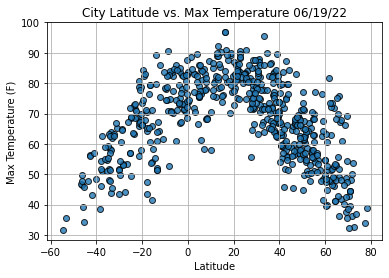

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("/Users/lukehg/Desktop/DA_class/week_6/world_weather_analysis/Fig1.png")

# Show plot.
plt.show()

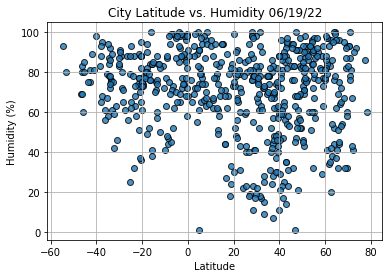

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("/Users/lukehg/Desktop/DA_class/week_6/world_weather_analysis/Fig2.png")
# Show plot.
plt.show()

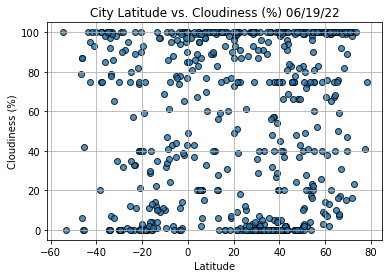

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("/Users/lukehg/Desktop/DA_class/week_6/world_weather_analysis/Fig3.png")
# Show plot.
plt.show()

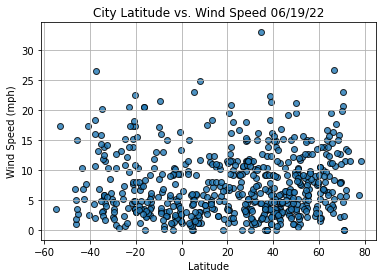

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("/Users/lukehg/Desktop/DA_class/week_6/world_weather_analysis/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()    
    

In [24]:
index13 = city_data_df.loc[13]
index13

City                     Cidreira
Country                        BR
Date          2022-06-20 02:45:09
Lat                      -30.1811
Lng                      -50.2056
Max Temp                    51.58
Humidity                       83
Cloudiness                      0
Wind Speed                   5.21
Name: 13, dtype: object

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,High Level,CA,2022-06-20 02:45:05,58.5169,-117.1360,62.71,88,75,2.30
1,Hilo,US,2022-06-20 02:45:05,19.7297,-155.0900,82.27,73,100,11.50
3,Ribeira Grande,PT,2022-06-20 02:45:06,38.5167,-28.7000,63.59,74,27,22.41
4,Muravlenko,RU,2022-06-20 02:45:06,63.7898,74.5230,71.98,44,67,6.31
6,Albany,US,2022-06-20 02:45:07,42.6001,-73.9662,59.45,56,2,1.99


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

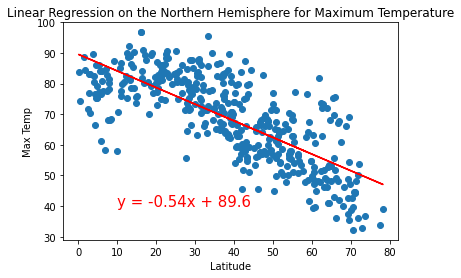

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

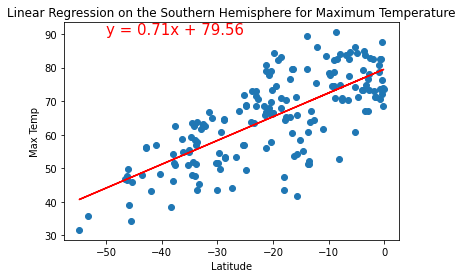

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

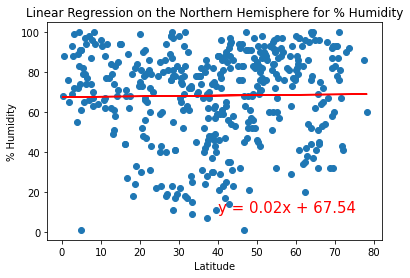

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

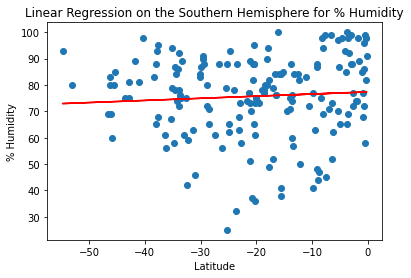

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

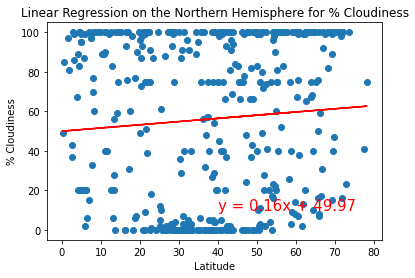

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

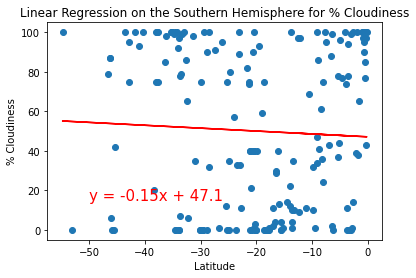

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,15))

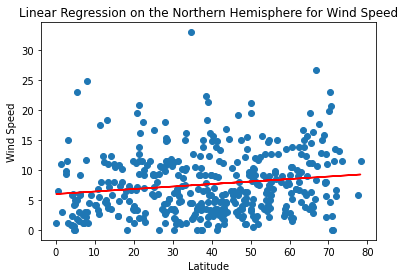

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

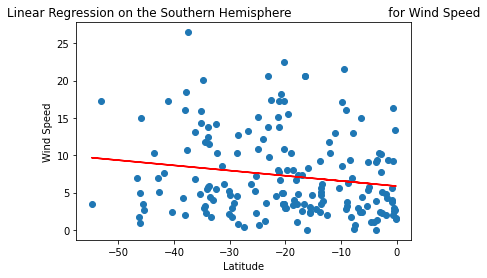

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))